<Axes: >

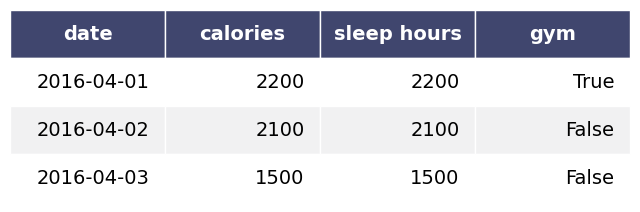

In [1]:
# Versao 1 (Editado com formatação)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six

df = pd.DataFrame()
df['date'] = ['2016-04-01', '2016-04-02', '2016-04-03']
df['calories'] = [2200, 2100, 1500]
df['sleep hours'] = [2200, 2100, 1500]
df['gym'] = [True, False, False]


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns=0, col_width=2.0)

In [2]:
# Versao 2

import pandas as pd
from pptx import Presentation
from pptx.util import Inches

def export_dataframe_to_pptx(dataframe, output_file):
    # Criar um arquivo PowerPoint e adicionar um slide
    prs = Presentation()
    slide = prs.slides.add_slide(prs.slide_layouts[5])  # Layout de título e conteúdo

    # Definir o título do slide
    title = slide.shapes.title
    title.text = "Dados do DataFrame"

    # Criar uma tabela para exibir os dados do DataFrame
    num_rows, num_cols = dataframe.shape
    left = Inches(1)
    top = Inches(2)
    width = Inches(8)
    height = Inches(4)
    table = slide.shapes.add_table(num_rows + 1, num_cols, left, top, width, height).table

    # Definir cabeçalhos da tabela com os nomes das colunas do DataFrame
    for i, col in enumerate(dataframe.columns):
        table.cell(0, i).text = col

    # Preencher a tabela com os dados do DataFrame
    for r in range(num_rows):
        for c in range(num_cols):
            table.cell(r + 1, c).text = str(dataframe.iloc[r, c])

    # Salvar o arquivo PowerPoint
    prs.save(output_file)
    print(f"Arquivo {output_file} criado com sucesso!")

# Exemplo de uso
if __name__ == "__main__":
    # Exemplo de DataFrame para teste
    data = {
        "Nome": ["João", "Maria", "Pedro"],
        "Idade": [25, 30, 22],
        "Cidade": ["São Paulo", "Rio de Janeiro", "Belo Horizonte"],
    }
    df = pd.DataFrame(data)

    # Exportar DataFrame para arquivo PPTX
    output_filename = "dados_dataframe.pptx"
    export_dataframe_to_pptx(df, output_filename)


Arquivo dados_dataframe.pptx criado com sucesso!
